In [55]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [41]:
dfM = pd.read_csv('Data/dataM.csv')

In [42]:
dfM.head(1)

,Date,incident_d,zip,latitude,longitude,hour_of_da,day_of_wee,date_incid,B25057e1,B25058e1,...,MAX_TEMPERATUREF,PRECIPITATIONIN,MEAN_VISIBILITYMILES,CityName,IncidentGroup2,TotalPoverty,weatherEventGroup,ZoningGroup,Year,Month
0,2016-12-31 02:12:00,12/31/2016 02:12:00 AM,30338,33.925571,-84.315793,2,Saturday,2016-12-31 00:00:00,472.0,527.0,...,47.0,0.17,9.0,DUNWOODY,Family_Offense,66.5,Rain,,2016,12


In [ ]:
dfM.set_index('Date', inplace=True) # run this first ... Date column created in last ipynb

In [46]:
dfM.index = pd.to_datetime(dfM.index) # this second ....

In [49]:
dfM.drop('incident_d', axis = 1, inplace = True) # drop the original date column

In [50]:
dfM.head()

,zip,latitude,longitude,hour_of_da,day_of_wee,date_incid,B25057e1,B25058e1,B25059e1,B25076e1,...,MAX_TEMPERATUREF,PRECIPITATIONIN,MEAN_VISIBILITYMILES,CityName,IncidentGroup2,TotalPoverty,weatherEventGroup,ZoningGroup,Year,Month
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-31 02:12:00,30338,33.925571,-84.315793,2,Saturday,2016-12-31 00:00:00,472.0,527.0,601.0,210700.0,...,47.0,0.17,9.0,DUNWOODY,Family_Offense,66.5,Rain,,2016,12
2016-12-31 09:39:00,0,33.943571,-84.331624,9,Saturday,2016-12-31 00:00:00,951.0,1046.5,1244.0,260900.0,...,47.0,0.17,9.0,DUNWOODY,Traffic,12.0,Rain,,2016,12
2016-06-13 18:07:00,30346,33.926443,-84.337153,18,Monday,2016-06-13 00:00:00,922.5,1108.0,1329.0,233850.0,...,99.0,0.00,10.0,DUNWOODY,Traffic,272.0,NaN,,2016,6
2016-06-13 18:40:00,0,33.943571,-84.331624,18,Monday,2016-06-13 00:00:00,951.0,1046.5,1244.0,260900.0,...,99.0,0.00,10.0,DUNWOODY,Traffic,12.0,NaN,,2016,6
2016-04-25 13:58:00,30346,33.925912,-84.336548,13,Monday,2016-04-25 00:00:00,922.5,1108.0,1329.0,233850.0,...,81.0,0.00,10.0,DUNWOODY,Disorder,272.0,NaN,Office,2016,4


In [51]:
dfM.dtypes

zip                       int64
latitude                float64
longitude               float64
hour_of_da                int64
day_of_wee               object
date_incid               object
B25057e1                float64
B25058e1                float64
B25059e1                float64
B25076e1                float64
B25077e1                float64
B25078e1                float64
B25018e1                float64
B25001e1                float64
B25002e1                float64
B25002e2                float64
B25002e3                float64
B19013e1                float64
EST                      object
MAX_TEMPERATUREF        float64
PRECIPITATIONIN          object
MEAN_VISIBILITYMILES    float64
CityName                 object
IncidentGroup2           object
TotalPoverty            float64
weatherEventGroup        object
ZoningGroup              object
Year                      int64
Month                     int64
dtype: object

### Time Series 

In [52]:
import seaborn as sb
# seaborn the dataviz api to use
%matplotlib inline

In [53]:
dummies = pd.get_dummies(dfM['IncidentGroup2'])
dfM2 = dfM.join(dummies)
dfM2.head()

,zip,latitude,longitude,hour_of_da,day_of_wee,date_incid,B25057e1,B25058e1,B25059e1,B25076e1,...,Month,Assault,Breaking_Enter,Disorder,Drugs,Family_Offense,Property_Crime,Theft,Traffic,Traffic_DUI
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0,33.965092,-84.314529,0,Friday,2010-01-01 00:00:00,683.0,741.5,1000.5,403250.0,...,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2010-01-01,0,33.965092,-84.314529,0,Friday,2010-01-01 00:00:00,683.0,741.5,1000.5,403250.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2010-01-01,0,33.965092,-84.314529,0,Friday,2010-01-01 00:00:00,683.0,741.5,1000.5,403250.0,...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01,0,33.919469,-84.359070,0,Friday,2010-01-01 00:00:00,834.0,1115.5,1315.5,159500.0,...,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2010-01-01,0,33.919469,-84.359070,0,Friday,2010-01-01 00:00:00,834.0,1115.5,1315.5,159500.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [57]:
dfM2.IncidentGroup2.value_counts()

Theft             29196
Traffic           18570
Property_Crime    12403
Breaking_Enter     6581
Disorder           5497
Assault            5442
Traffic_DUI        2845
Family_Offense     2817
Drugs              1525
Name: IncidentGroup2, dtype: int64

In [61]:
import matplotlib.pyplot as plt

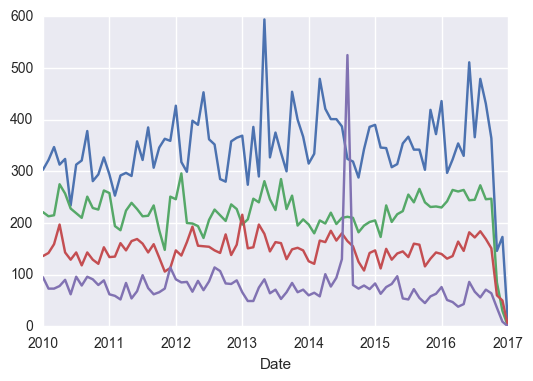

In [68]:
# data['Sales'].resample('M').mean()
legend_labels  = ['Theft', 'Traffic', 'Property_Crime']
plt.legend(legend_labels)

dfM2['Theft'].resample('M').sum().plot()
dfM2['Traffic'].resample('M').sum().plot()
dfM2['Property_Crime'].resample('M').sum().plot()
dfM2['Breaking_Enter'].resample('M').sum().plot()

# how to get a legend???

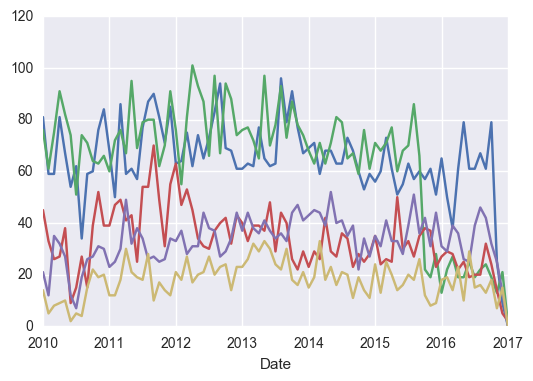

In [69]:
dfM2['Disorder'].resample('M').sum().plot()
dfM2['Assault'].resample('M').sum().plot()
dfM2['Traffic_DUI'].resample('M').sum().plot()
dfM2['Family_Offense'].resample('M').sum().plot()
dfM2['Drugs'].resample('M').sum().plot()

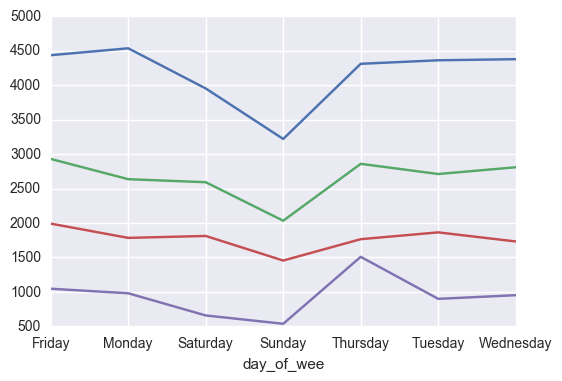

In [74]:
dfM2['Theft'].groupby(dfM2["day_of_wee"]).sum().plot()
dfM2['Traffic'].groupby(dfM2["day_of_wee"]).sum().plot()
dfM2['Property_Crime'].groupby(dfM2["day_of_wee"]).sum().plot()
dfM2['Breaking_Enter'].groupby(dfM2["day_of_wee"]).sum().plot()

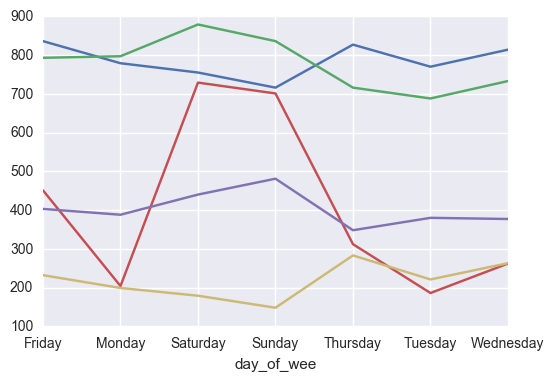

In [73]:
dfM2['Disorder'].groupby(dfM2["day_of_wee"]).sum().plot()
dfM2['Assault'].groupby(dfM2["day_of_wee"]).sum().plot()
dfM2['Traffic_DUI'].groupby(dfM2["day_of_wee"]).sum().plot()
dfM2['Family_Offense'].groupby(dfM2["day_of_wee"]).sum().plot()
dfM2['Drugs'].groupby(dfM2["day_of_wee"]).sum().plot()

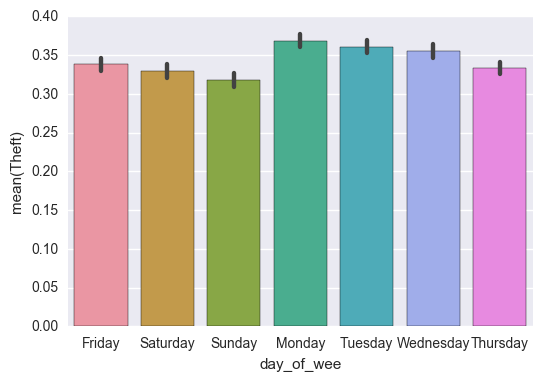

In [80]:
sb.barplot(x = dfM2.day_of_wee, y = dfM2.Theft)

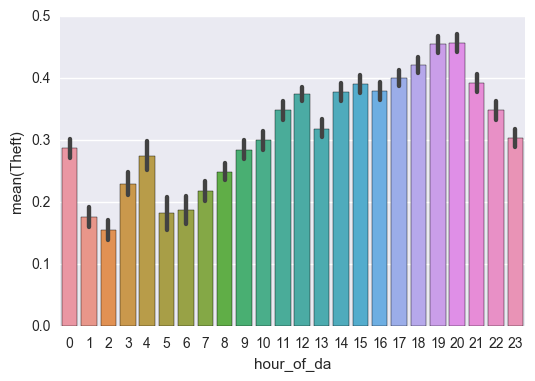

In [81]:
sb.barplot(x = dfM2.hour_of_da, y = dfM2.Theft)